In [1]:
import avar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
# %matplotlib inline


# print(data.product_id.mode())
# prod = data[data.product_id == 'B001MA0QY2'] #B00188IFHS B001MA0QY2
# print(len(prod))
# sorted = prod.sort_values('time')
# print(sorted)






<IPython.core.display.Javascript object>


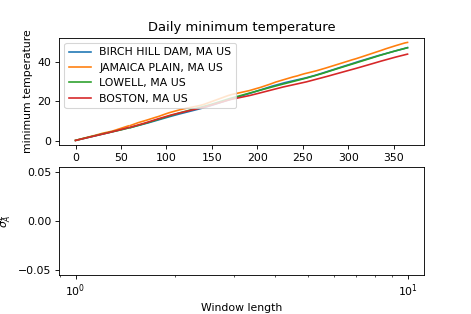

In [51]:

# data = pd.read_csv('data_melborn_daily_temp.csv',names=['date', 'temp'],skiprows=1)
# DATA = data['temp']



data = pd.read_csv('data_climate.csv')

station_list = ['BIRCH HILL DAM, MA US',
                'JAMAICA PLAIN, MA US',
                'LOWELL, MA US',
                'BOSTON, MA US']

fig, axs = plt.subplots(2)

for name in station_list:
    data1 = data[data['NAME'] == name]
    DATA = data1['YTD-PRCP-NORMAL']



    Y = []
    # for i in data['temp']:
    for i in DATA:
        try:
            Y.append(float(i))
        except:
            pass
    y = Y
    # y = [float(i) for i in y]
    taus = list(range(1, 100))



    char = avar.CharacteristicScale()
    
    A = char.allanvar(Y, taus)



    
    # axs[0].scatter(range(len(sorted)), sorted['rate'],alpha=0.01)
    axs[0].plot(y,label=name)
    axs[0].set_xlabel('day')
    axs[0].set_ylabel('minimum temperature')
    axs[0].legend()
    axs[1].plot(A)
    axs[1].set_xscale("log")
    axs[1].set_xlabel('Window length')
    axs[1].set_ylabel('$\sigma_A^2$')
axs[0].set_title("Daily minimum temperature")
plt.show()


<IPython.core.display.Javascript object>


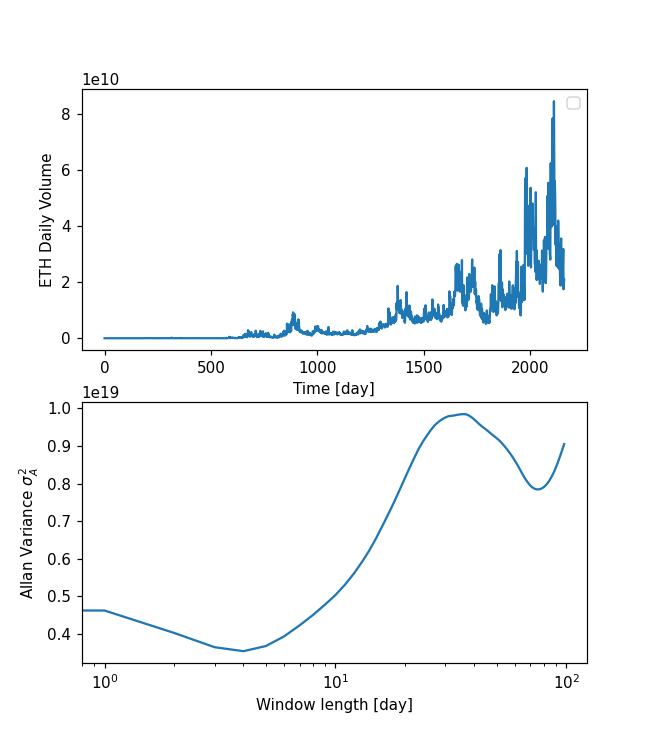

No handles with labels found to put in legend.


In [10]:
data = pd.read_csv('data_ethereum.csv')


fig, axs = plt.subplots(2)


    
DATA = data['Volume']



Y = []
# for i in data['temp']:
for i in DATA:
    try:
        Y.append(float(i))
    except:
        pass
y = Y
# y = [float(i) for i in y]
taus = list(range(1, 100))



char = avar.CharacteristicScale()

A = char.allanvar(Y, taus)


# axs[0].scatter(range(len(sorted)), sorted['rate'],alpha=0.01)
axs[0].plot(y)
axs[0].set_xlabel('Time [day]')
axs[0].set_ylabel('ETH Daily Volume')
axs[0].legend()
axs[1].plot(A)
axs[1].set_xscale("log")
axs[1].set_xlabel('Window length [day]')
axs[1].set_ylabel('Allan Variance $\sigma_A^2$')
# axs[0].set_title("Daily minimum temperature")
plt.show()


<IPython.core.display.Javascript object>


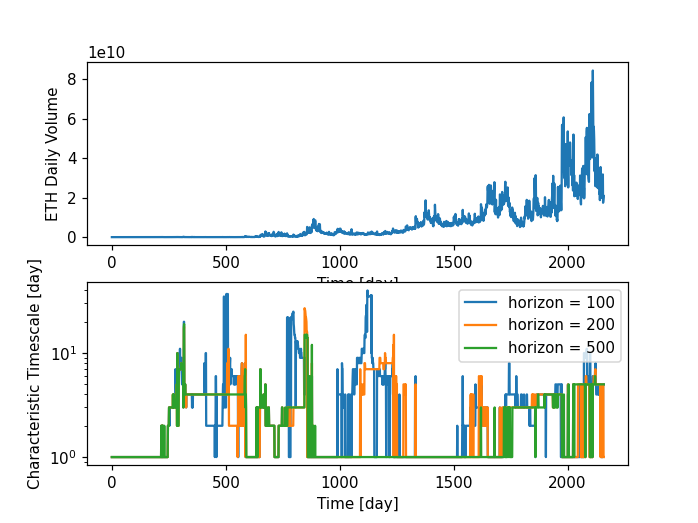

In [9]:
from scipy.ndimage import gaussian_filter1d

data = pd.read_csv('data_ethereum.csv')
[float(i) for i in data['Volume']] 

fig, axs = plt.subplots(2)
horizons = [100, 200, 500]
# horizons = [200]
for h in horizons:
    char = avar.CharacteristicScale(horizon=h)

    M_c = []
    for day, v in enumerate(data['Volume']):
        char.memory.append(v)
        if day > 200:
            davar = char.dynallanvar()
#             davar_smooth = gaussian_filter1d(davar, 5)
            m_c = char.find_charecteristic_scale(davar)
            M_c.append(m_c)
        else:
            M_c.append(1)

    axs[1].plot(M_c, label='horizon = '+str(h))
    axs[1].set_xlabel('Time [day]')
    axs[1].set_ylabel('Characteristic Timescale [day]')
    axs[1].set_yscale("log")
    axs[1].legend()
axs[0].plot(data['Volume'])
axs[0].set_xlabel('Time [day]')
axs[0].set_ylabel('ETH Daily Volume')
plt.show()
